# ANALAYSING DATASETS

# *Lyrics Analysis*

In [2]:
import pandas as pd
my_array = []
file = open("musics\lyrics_2.txt", "r", encoding="utf-8")
lines = file.readlines()

for line in lines:
    my_array.append(line.lower())

print(type(my_array))

<class 'list'>


In [3]:
from collections import defaultdict
import re
import enchant


d = enchant.Dict("en_US")
counts = defaultdict(int)
for text in my_array:
    for word in re.findall('\w+', text):
        if d.check(word) and word != 'ah' and word != 'ohh' :
            if word != 'oh':
                counts[word] += 1
            

soted = sorted(counts.items(), reverse=True, key=lambda tup: tup[1])      
#print(counts)

In [4]:
import pandas as pd

df = pd.DataFrame(soted)
df.columns =['word','count']
df.head()

da = df.head(50)

C:\Users\seyit\AppData\Local\Temp\ipykernel_10484\790060192.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ab = sns.barplot(x = 'word', y = 'count',


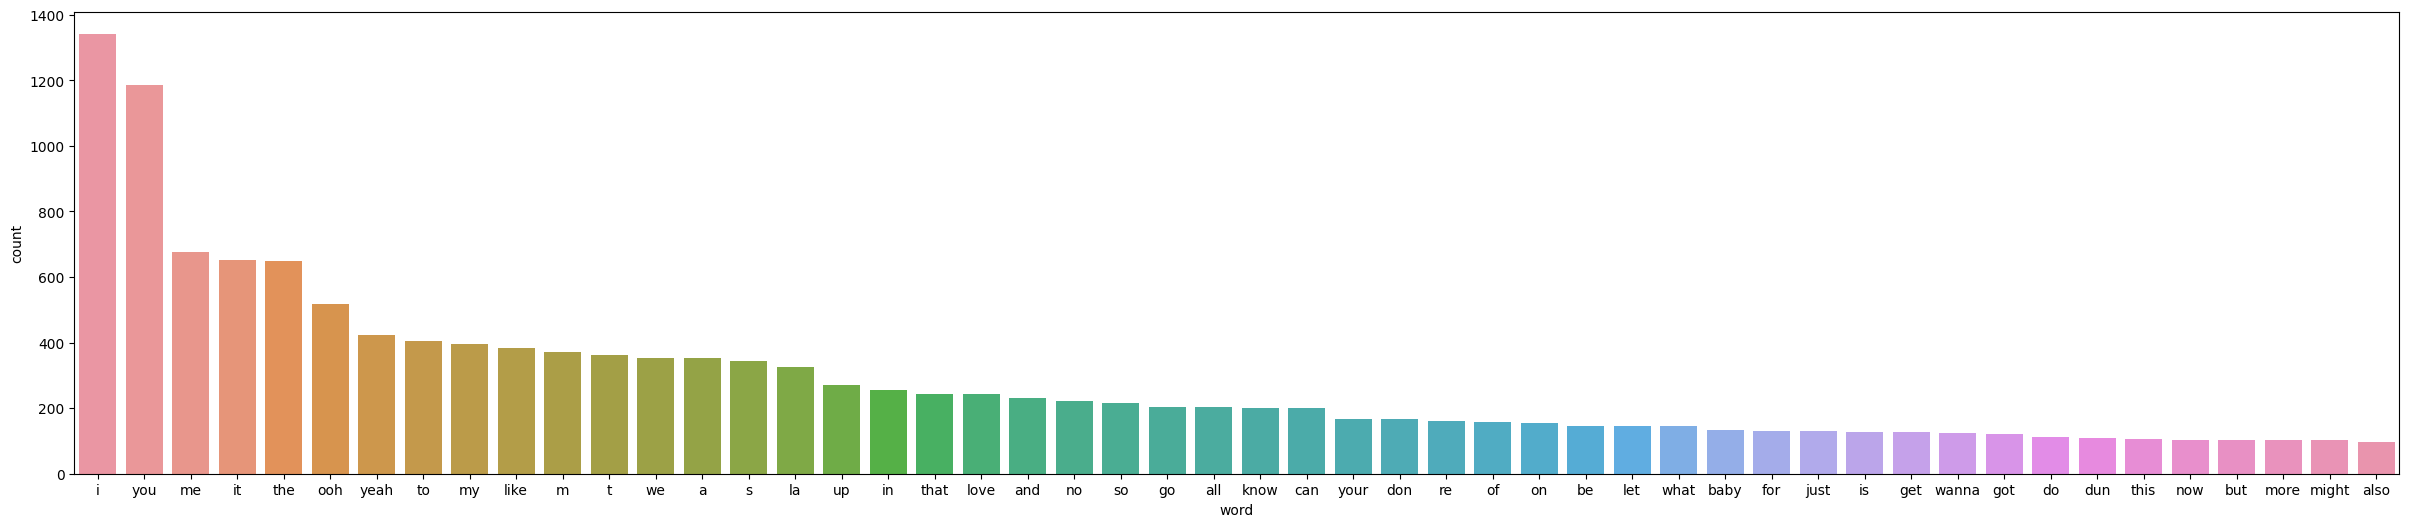

     word  count
0       i   1342
1     you   1185
2      me    676
3      it    651
4     the    648
5     ooh    518
6    yeah    422
7      to    404
8      my    397
9    like    383
10      m    371
11      t    363
12     we    354
13      a    354
14      s    344
15     la    326
16     up    270
17     in    256
18   that    244
19   love    243
20    and    231
21     no    222
22     so    215
23     go    205
24    all    204
25   know    200
26    can    199
27   your    166
28    don    166
29     re    162
30     of    157
31     on    154
32     be    147
33    let    147
34   what    146
35   baby    134
36    for    131
37   just    130
38     is    127
39    get    126
40  wanna    123
41    got    122
42     do    111
43    dun    110
44   this    105
45    now    104
46    but    103
47   more    103
48  might    102
49   also     97


In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.subplots(figsize=(30, 6))
ab = sns.barplot(x = 'word', y = 'count', 
            estimator = np.mean,
            ci = None,
            data = da)
plt.show()
print(da)
ab.figure.savefig("figures\lyrics_analaysis.png")

# *Spotify Songs Feature Analysis*

In [7]:
import pandas as pd
from datetime import datetime


df1 = pd.read_csv(r'musics\spotify_features.csv')

df2 = df1[['release_date','popularity','danceability','acousticness','energy','instrumentalness','liveness','loudness','speechiness','tempo']]
df2.info()
for x in df2.index:
    if df2['popularity'][x] == '-':
        df2 = df2.drop(x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5102 entries, 0 to 5101
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   release_date      5102 non-null   object
 1   popularity        5102 non-null   object
 2   danceability      5102 non-null   object
 3   acousticness      5102 non-null   object
 4   energy            5102 non-null   object
 5   instrumentalness  5102 non-null   object
 6   liveness          5102 non-null   object
 7   loudness          5102 non-null   object
 8   speechiness       5102 non-null   object
 9   tempo             5102 non-null   object
dtypes: object(10)
memory usage: 398.7+ KB


In [8]:
year = []
a = 2000
for x in range(24):
    if x == 0:
        year.append('1900s')
    else:
        year.append(str(a))
        a = a+1

sum1 = []
sum2 = []
sum3 = []
sum4 = []
sum5 = []
sum6 = []
sum7 = []
sum8 = []
sum9 = []
a = 2000
for x in range(24):
    count = 0
    sum11 = 0
    sum21 = 0
    sum31 = 0
    sum41 = 0
    sum51 = 0
    sum61 = 0
    sum71 = 0
    sum81 = 0
    sum91 = 0
    if x == 0:
        for c in df2.values:
            if c[0] < str(a):
                count = count + 1
                sum11 = sum11 + float(c[1])
                sum21 = sum21 + float(c[2])
                sum31 = sum31 + float(c[3])
                sum41 = sum41 + float(c[4])
                sum51 = sum51 + float(c[5])
                sum61 = sum61 + float(c[6])
                sum71 = sum71 + float(c[7])
                sum81 = sum81 + float(c[8])
                sum91 = sum91 + float(c[9])
        sum1.append(sum11 / count)
        sum2.append(sum21 / count)
        sum3.append(sum31 / count)
        sum4.append(sum41 / count)
        sum5.append(sum51 / count)
        sum6.append(sum61  / count)
        sum7.append(sum71  / count)
        sum8.append(sum81  / count)
        sum9.append(sum91 / count)  
    else:
        for c in df2.values:
            if str(a)<c[0] < str(a+1):
                count = count + 1
                sum11 = sum11 + float(c[1])
                sum21 = sum21 + float(c[2])
                sum31 = sum31 + float(c[3])
                sum41 = sum41 + float(c[4])
                sum51 = sum51 + float(c[5])
                sum61 = sum61 + float(c[6])
                sum71 = sum71 + float(c[7])
                sum81 = sum81 + float(c[8])
                sum91 = sum91 + float(c[9])
        sum1.append(sum11 / count)
        sum2.append(sum21 / count)
        sum3.append(sum31 / count)
        sum4.append(sum41 / count)
        sum5.append(sum51 / count)
        sum6.append(sum61 / count)
        sum7.append(sum71 / count)
        sum8.append(sum81 / count)
        sum9.append(sum91 / count)
        a = a+1

        
df_data = pd.DataFrame()
df_data.insert(0,'year',year)
df_data.insert(0,'popularity',sum1)
df_data.insert(0,'danceability',sum2)
df_data.insert(0,'acousticness',sum3)
df_data.insert(0,'energy',sum4)
df_data.insert(0,'instrumentalness',sum5)
df_data.insert(0,'liveness',sum6)
df_data.insert(0,'loudness',sum7)
df_data.insert(0,'speechiness',sum8)
df_data.insert(0,'tempo',sum9)

df_data.head(24)

,tempo,speechiness,loudness,liveness,instrumentalness,energy,acousticness,danceability,popularity,year
0,128.078171,0.107926,-7.245371,0.164957,7.874943e-04,0.695371,0.161964,0.629829,25.457143,1900s
1,114.098500,0.088917,-6.612667,0.300300,1.488643e-03,0.728833,0.148183,0.567000,24.000000,2000
2,110.036167,0.096350,-5.742667,0.131450,5.894524e-02,0.751500,0.085350,0.722500,10.500000,2001
3,114.531889,0.094889,-5.022111,0.135233,1.230000e-06,0.755000,0.179889,0.655444,41.222222,2002
4,107.019857,0.063457,-5.145286,0.194586,0.000000e+00,0.748857,0.173271,0.745857,30.285714,2003
5,115.617714,0.058875,-5.641500,0.180286,3.891148e-02,0.723536,0.280817,0.651643,24.428571,2004
6,122.654474,0.070747,-3.723684,0.216842,7.042265e-03,0.801895,0.188468,0.664947,22.894737,2005
7,119.992400,0.084795,-5.141050,0.126230,4.925000e-07,0.748550,0.139495,0.722950,28.650000,2006
8,121.260679,0.058314,-4.803536,0.153554,3.343274e-02,0.756214,0.144441,0.693750,29.107143,2007
9,124.542903,0.074023,-5.265452,0.163890,5.507248e-02,0.796968,0.143920,0.679097,33.225806,2008


C:\Users\seyit\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


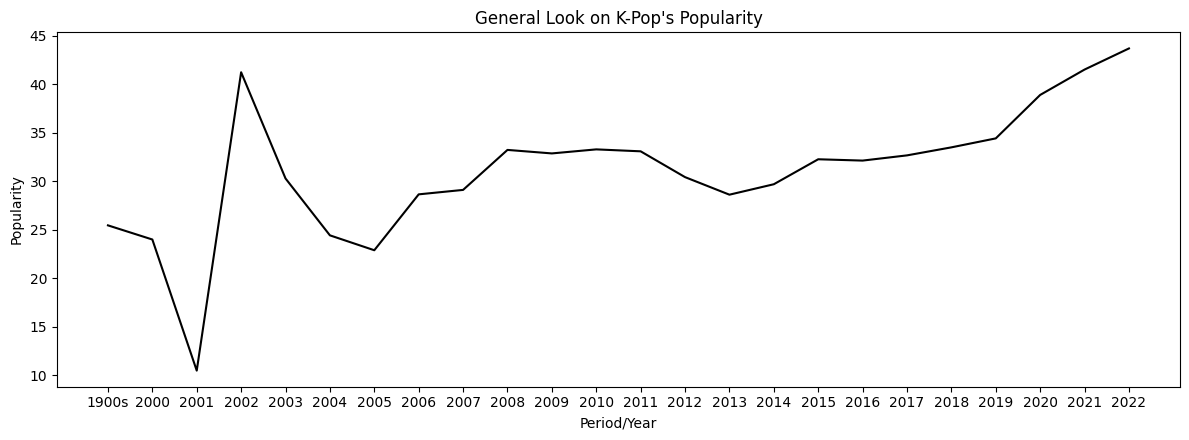

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.rcParams["figure.figsize"] = [12, 4.5]
plt.rcParams["figure.autolayout"] = True
x = df_data["year"]
y = df_data["popularity"]
plt.plot(x, y, color='black')
plt.title("General Look on K-Pop's Popularity")
plt.xlabel("Period/Year")
plt.ylabel("Popularity")
spacing = 0.110
fig.subplots_adjust(bottom=spacing)
plt.show()
fig.savefig("figures/popularity.png")

C:\Users\seyit\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


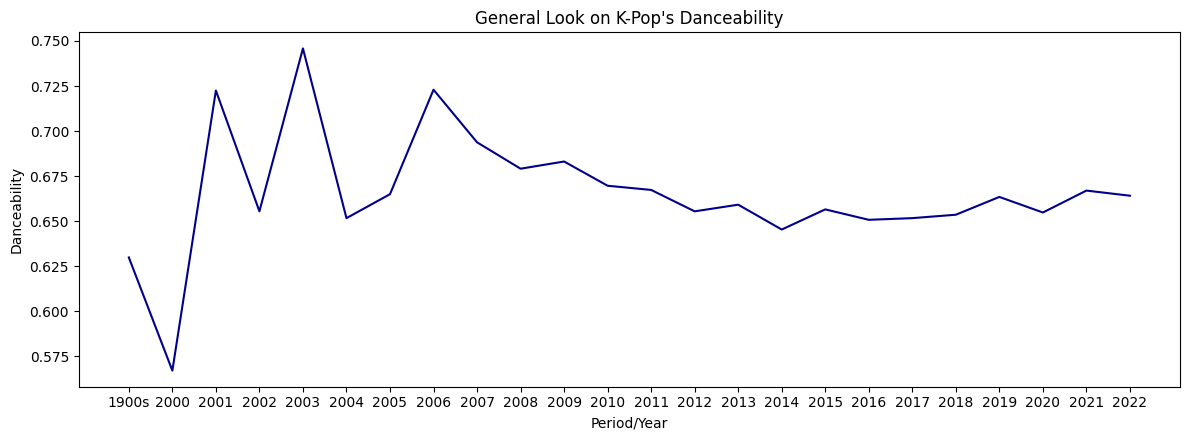

In [11]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = [20, 4.5]
plt.rcParams["figure.autolayout"] = True
x = df_data["year"]
y = df_data["danceability"]
plt.plot(x, y, color='darkblue')
plt.title("General Look on K-Pop's Danceability")
plt.xlabel("Period/Year")
plt.ylabel("Danceability")
spacing = 0.110
fig.subplots_adjust(bottom=spacing)
plt.show()
fig.savefig("figures/danceability.png")

C:\Users\seyit\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


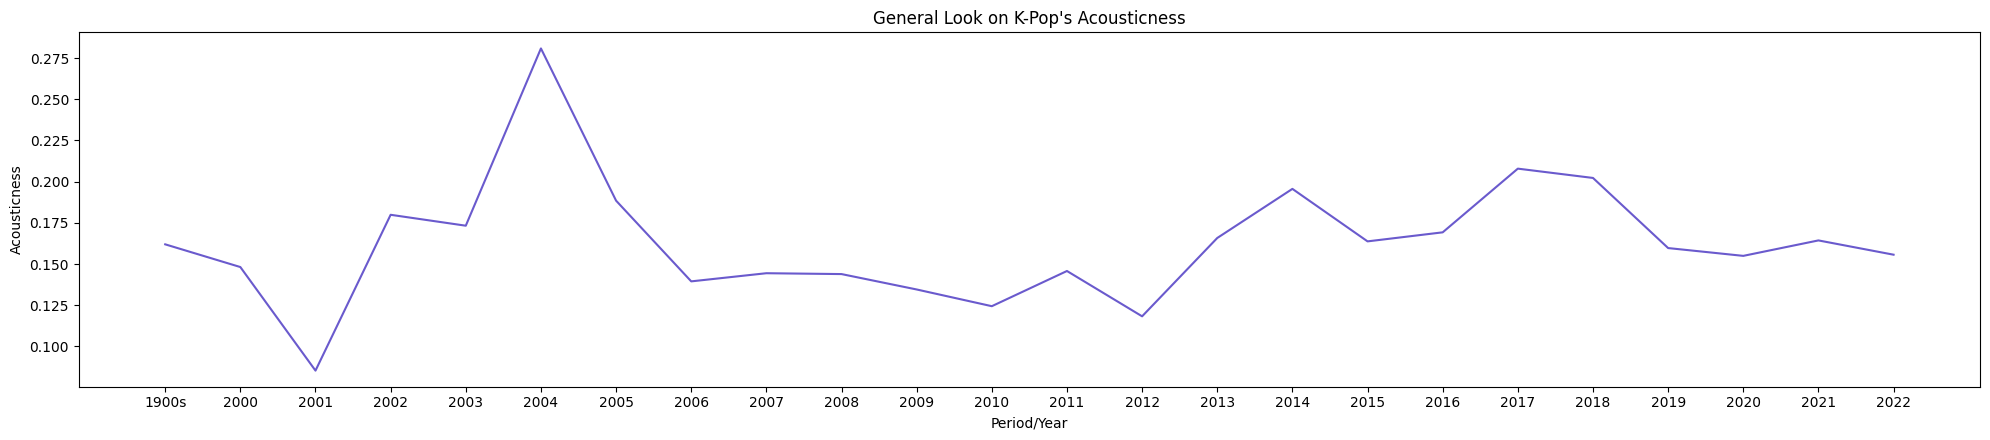

In [12]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = [12, 4.5]
plt.rcParams["figure.autolayout"] = True
x = df_data["year"]
y = df_data["acousticness"]
plt.plot(x, y, color='slateblue')
plt.title("General Look on K-Pop's Acousticness")
plt.xlabel("Period/Year")
plt.ylabel("Acousticness")
spacing = 0.110
fig.subplots_adjust(bottom=spacing)
plt.show()
fig.savefig("figures/acousticness.png")

C:\Users\seyit\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


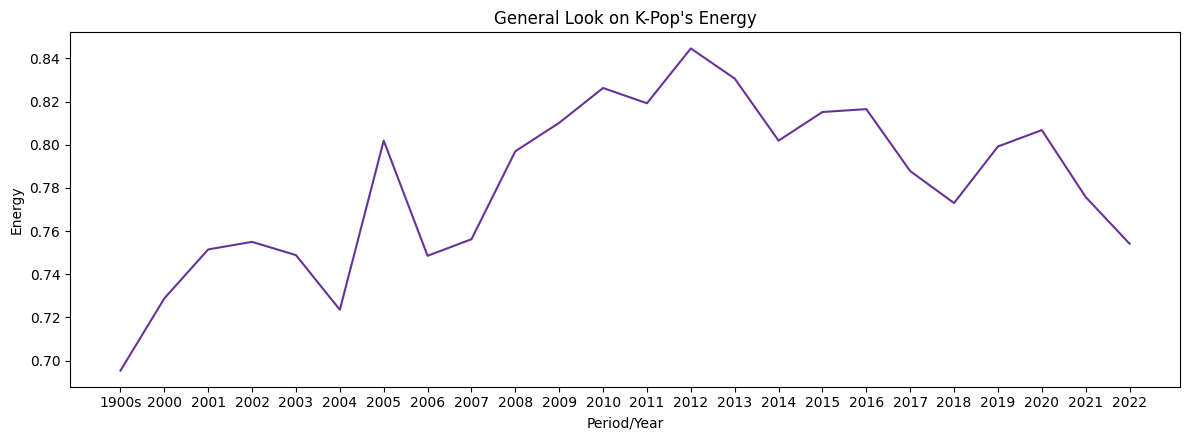

In [13]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = [12, 4.5]
plt.rcParams["figure.autolayout"] = True
x = df_data["year"]
y = df_data["energy"]
plt.plot(x, y, color='rebeccapurple')
plt.title("General Look on K-Pop's Energy")
plt.xlabel("Period/Year")
plt.ylabel("Energy")
spacing = 0.110
fig.subplots_adjust(bottom=spacing)
plt.show()
fig.savefig("figures/energy.png")

C:\Users\seyit\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


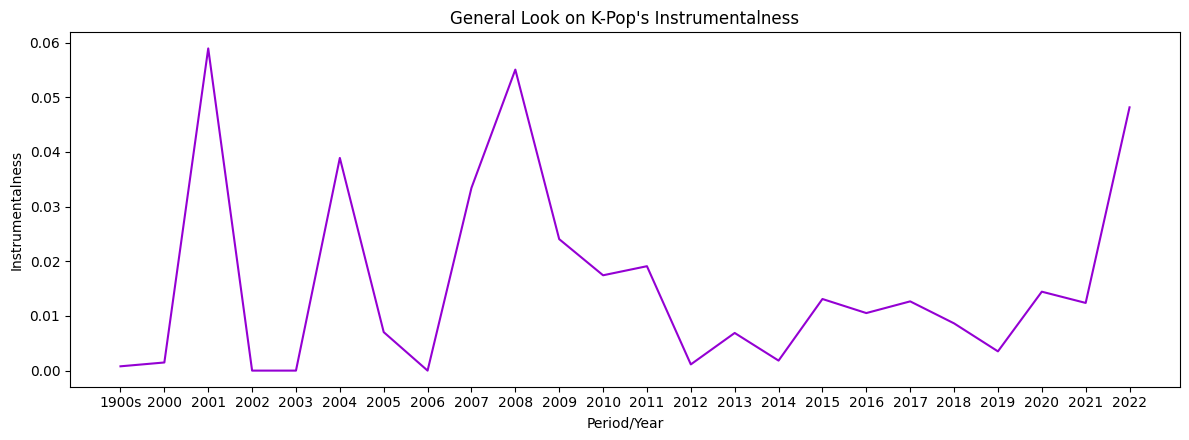

In [14]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = [12, 4.5]
plt.rcParams["figure.autolayout"] = True
x = df_data["year"]
y = df_data["instrumentalness"]
plt.plot(x, y, color='darkviolet')
plt.title("General Look on K-Pop's Instrumentalness")
plt.xlabel("Period/Year")
plt.ylabel("Instrumentalness")
spacing = 0.110
fig.subplots_adjust(bottom=spacing)
plt.show()
fig.savefig("figures/instrumentalness.png")

C:\Users\seyit\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


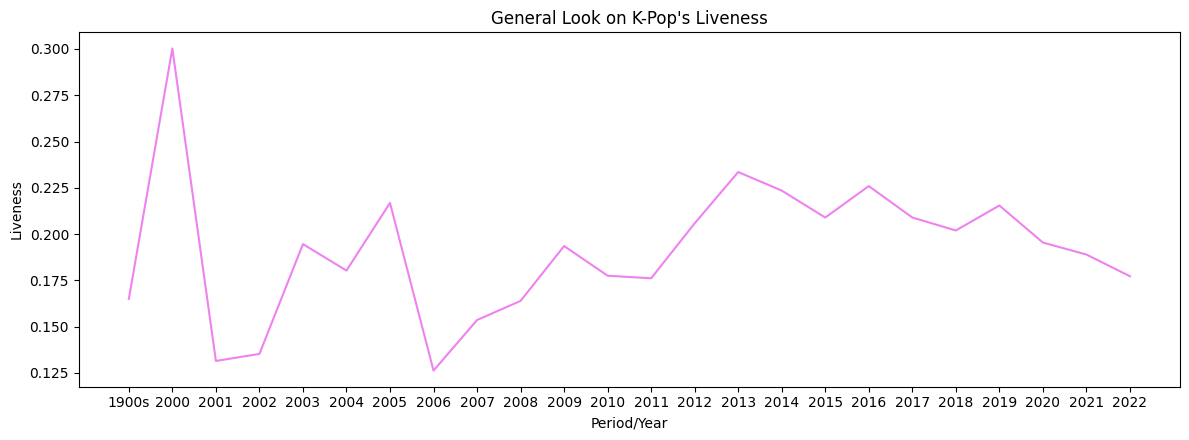

In [15]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = [12, 4.5]
plt.rcParams["figure.autolayout"] = True
x = df_data["year"]
y = df_data["liveness"]
plt.plot(x, y, color='violet')
plt.title("General Look on K-Pop's Liveness")
plt.xlabel("Period/Year")
plt.ylabel("Liveness")
spacing = 0.110
fig.subplots_adjust(bottom=spacing)
plt.show()
fig.savefig("figures/liveness.png")

C:\Users\seyit\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


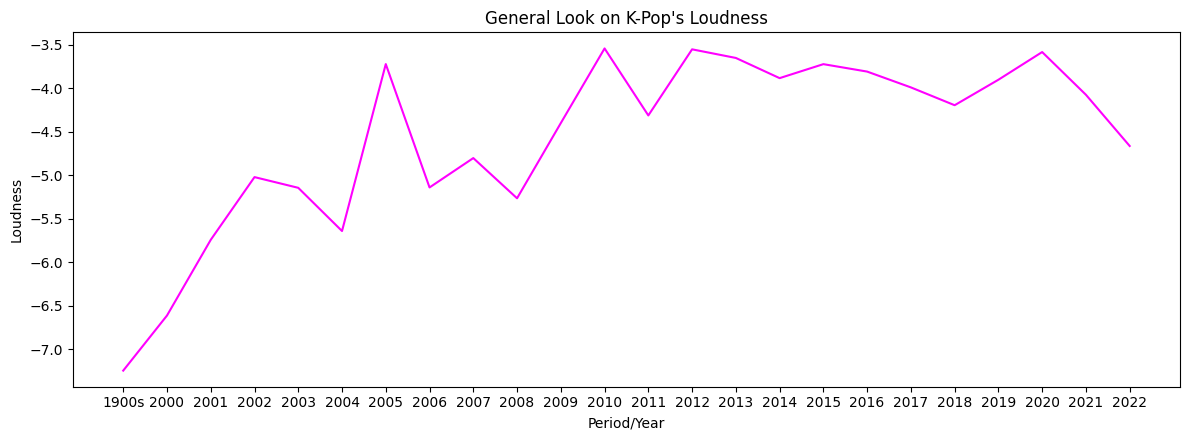

In [16]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = [12, 4.5]
plt.rcParams["figure.autolayout"] = True
x = df_data["year"]
y = df_data["loudness"]
plt.plot(x, y, color='fuchsia')
plt.title("General Look on K-Pop's Loudness")
plt.xlabel("Period/Year")
plt.ylabel("Loudness")
spacing = 0.110
fig.subplots_adjust(bottom=spacing)
plt.show()
fig.savefig("figures/loudness.png")

C:\Users\seyit\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


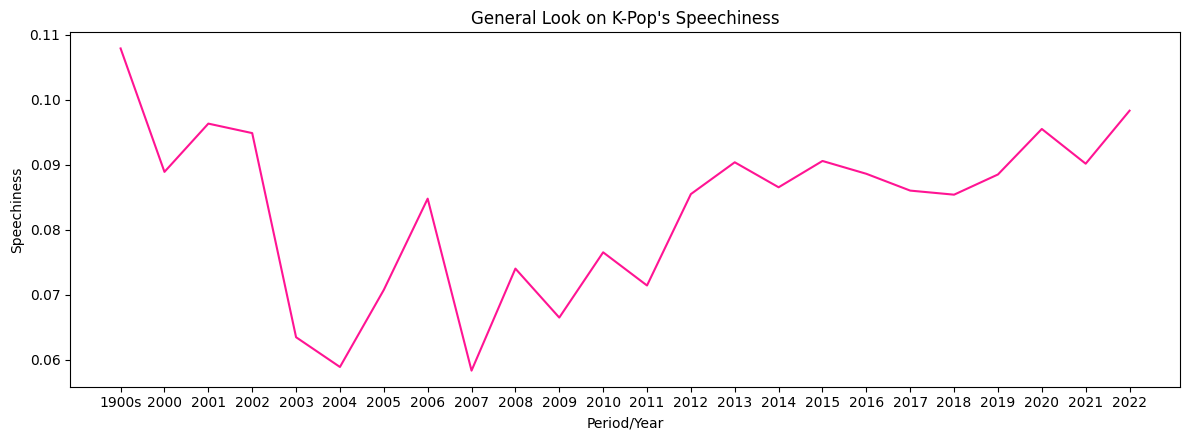

In [17]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = [12, 4.5]
plt.rcParams["figure.autolayout"] = True
x = df_data["year"]
y = df_data["speechiness"]
plt.plot(x, y, color='deeppink')
plt.title("General Look on K-Pop's Speechiness")
plt.xlabel("Period/Year")
plt.ylabel("Speechiness")
spacing = 0.110
fig.subplots_adjust(bottom=spacing)
plt.show()
fig.savefig("figures/speechiness.png")

C:\Users\seyit\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


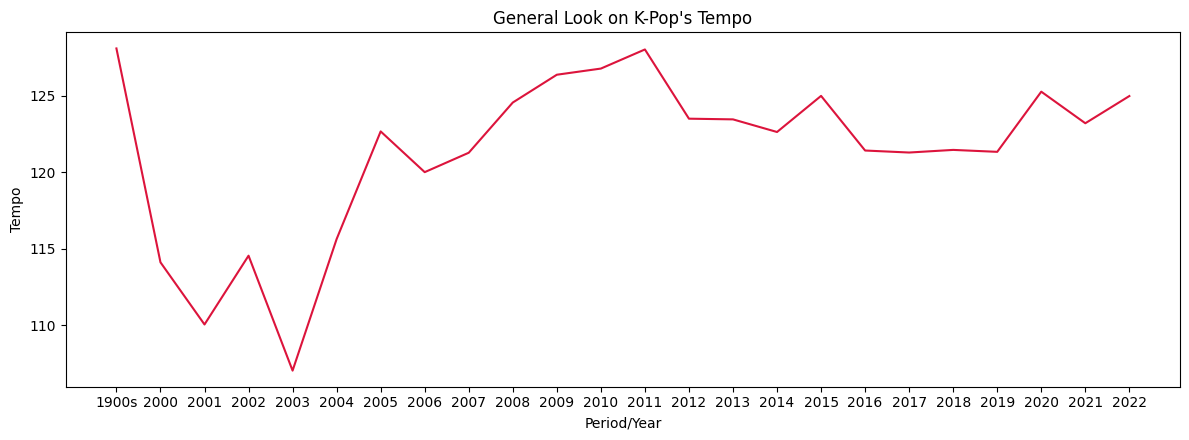

In [18]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = [12, 4.5]
plt.rcParams["figure.autolayout"] = True
x = df_data["year"]
y = df_data["tempo"]
plt.plot(x, y, color='crimson')
plt.title("General Look on K-Pop's Tempo")
plt.xlabel("Period/Year")
plt.ylabel("Tempo")
spacing = 0.110
fig.subplots_adjust(bottom=spacing)
plt.show()
fig.savefig("figures/tempo.png")

# *View Analysis*

In [20]:
import pandas as pd
from datetime import datetime as dt


df_data = pd.read_csv(r'musics\videos_like_view_counts.csv')
for x in df_data.index:
    if df_data['view_count'][x] == '0':
        df_data = df_data.drop(x)

df_data.info()
year = []
sums = []
a = 2000
for x in range(24):
    
    count = 0
    sum11 = 0
    if x == 0:
        for c in df_data.values:
            k = c[0].split('/')
            if len(k) == 1:
                if k[0] < str(a):
                    count = count + 1
                    sum11 = sum11 + float(c[8])
            else:
                if k[2] < str(a):
                    count = count + 1
                    sum11 = sum11 + float(c[8])

        sums.append(sum11 / count) 
        year.append('1900s')
    else:
        for c in df_data.values:
            k = c[0].split('/')
            if len(k) == 1:
                if k[0] < str(a):
                    count = count + 1
                    sum11 = sum11 + float(c[8])
            else:
                if str(a)<= k[2] < str(a+1):
                    count = count + 1
                    sum11 = sum11 + float(c[8])
              

        
        sums.append(sum11 / count)
        year.append(str(a))
        a = a+1

df_data2 = pd.DataFrame()
df_data2.insert(0,'year',year)
df_data2.insert(1,'view',sums)
df_data2.head(24)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5102 entries, 0 to 5101
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        5102 non-null   object
 1   artist      5102 non-null   object
 2   song_name   5101 non-null   object
 3   video       5102 non-null   object
 4   group_type  5102 non-null   object
 5   release     5089 non-null   object
 6   link        5102 non-null   object
 7   like_count  5102 non-null   int64 
 8   view_count  5102 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 358.9+ KB


,year,view
0,1900s,1.084172e+06
1,2000,1.084172e+06
2,2001,9.777799e+05
3,2002,9.476949e+05
4,2003,9.476352e+05
5,2004,1.007497e+06
6,2005,9.265141e+05
7,2006,9.870897e+05
8,2007,1.506984e+06
9,2008,2.481630e+06


C:\Users\seyit\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


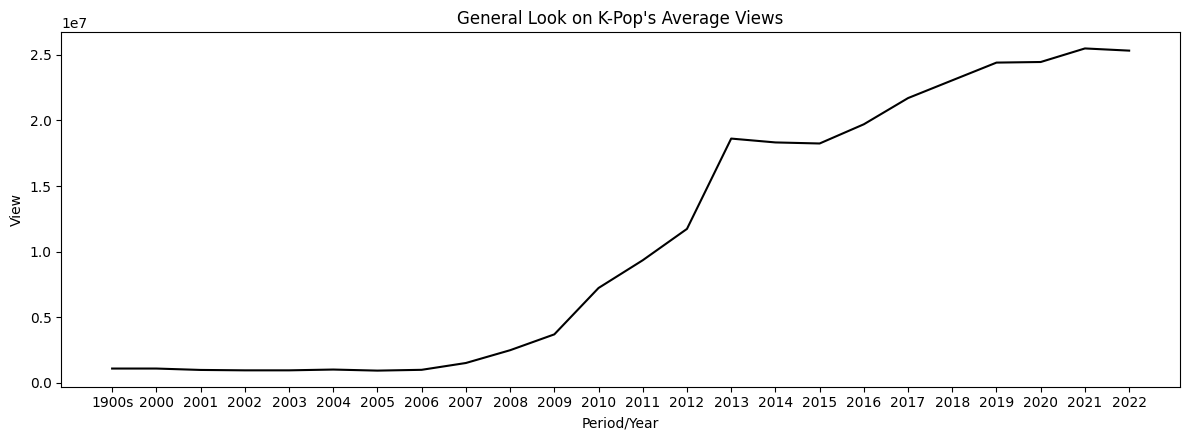

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.rcParams["figure.figsize"] = [12, 4.5]
plt.rcParams["figure.autolayout"] = True
x = df_data2["year"]
y = df_data2["view"]
plt.plot(x, y, color='lawngreen')
plt.title("General Look on K-Pop's Average Views")
plt.xlabel("Period/Year")
plt.ylabel("View")
spacing = 0.110
fig.subplots_adjust(bottom=spacing)
plt.show()
fig.savefig("figures/average_view.png")

# *Random Forest Classifier*

In [1]:
def listToString(s):
 
    # initialize an empty string
    str1 = ""
 
    # traverse in the string
    for ele in s:
        str1 += ele
 
    # return string
    return str1

In [2]:
import pandas as pd

df1 = pd.read_excel(r'musics/total_view_follower_of_groups.xlsx')

temp = []

for x in df1.index:
    srt = str(df1['views'][x]).split('.')
    temp.append(int(listToString(srt)))

del df1['views']

se = pd.Series(temp)
df1['views'] = se.values

temp = []
for x in df1.index:
    srt = df1['followers'][x].split('.')
    temp.append(int(listToString(srt).replace('+','')))

del df1['followers']    
se = pd.Series(temp)
df1['followers'] = se.values
    
popularity = []

for x in df1.index:
    if df1['views'][x] > 250000000:
        popularity.append('Superstar')
    if (df1['views'][x] <= 250000000 ) and (df1['views'][x] > 100000000):
        popularity.append('Very Popular')
    if (df1['views'][x] <= 100000000 ) and (df1['views'][x] > 10000000):
        popularity.append('Popular')
    if df1['views'][x] <= 10000000:
        # Nugu -> person is not popular but it lives like popular
        popularity.append('Nugu')


df1.head(204)        
se = pd.Series(popularity)
df1['popularity'] = se.values
df1.head(50)

,group,views,followers,popularity
0,Blackpink,16339072644,83400000,Superstar
1,BTS,25919795798,72500000,Superstar
2,Twice,10372714400,15100000,Superstar
3,BIGBANG,3912209384,14900000,Superstar
4,Stray Kids,3527912903,11200000,Superstar
5,TXT,1413426960,9980000,Superstar
6,Seventeen,2659124711,8710000,Superstar
7,ITZY,3068975690,7910000,Superstar
8,Enhypen,809869551,7010000,Superstar
9,Mamamoo,2179977645,6890000,Superstar


In [3]:
from sklearn.model_selection import train_test_split
y=df1['popularity']
x = df1[['views','followers']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 204)

In [4]:
from sklearn.ensemble import RandomForestClassifier as RFC
RF = RFC()
RF.fit(x_train,y_train)

RandomForestClassifier()

Accuracy Score: 0.9722222222222222


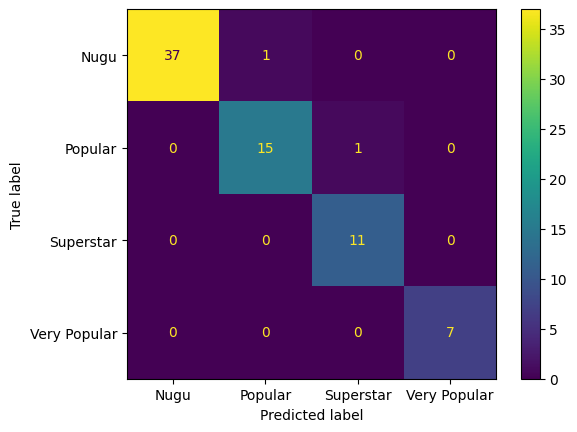

In [5]:
from sklearn import metrics
from sklearn.metrics import precision_score

y_pred = RF.predict(x_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = RF.classes_)
cm_display.plot()

print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))

In [11]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
estimator = RF.estimators_[6]
dot_data=export_graphviz(estimator, 
                feature_names = ["views","followers"],
                class_names = ['Very Popular','Popular','Superstar','Nugu'],
                rounded = True, proportion = False, 
                precision = 2, filled = True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"100,400!"')
graph.write_png('resized_tree.png')
from IPython.display import Image
Image(filename='resized_tree.png') 